In [1]:
!pip install requests
!pip install bs4


  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1256 sha256=0b28b17fe74ba8fd21ddec6c966bf7a23ec4dde68bf01de463b78db6160ca35f
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4


In [2]:
# creating the neflix.csv dataset
import requests
from bs4 import BeautifulSoup
import csv

# Send a GET request to the URL
url = "https://www.imdb.com/search/title/?companies=co0144901&ref_=fn_co_co_1"
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Extract the relevant data
lister_items = soup.find_all('div', class_='lister-item-content')

# Create a CSV file and write the header
with open('netflix.csv', 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['Title', 'Year', 'Genre', 'Rating', 'Description']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

    # Loop through the lister items and extract the desired information
    for item in lister_items:
        title = item.find('a', href=True).text.strip()
        year = item.find('span', class_='lister-item-year').text.strip()
        genre = item.find('span', class_='genre').text.strip()
        rating_element = item.find('strong')
        rating = rating_element.text.strip() if rating_element else 'N/A'
        description = item.find('p', class_='text-muted').text.strip()

        # Write the extracted information to the CSV file
        writer.writerow({'Title': title, 'Year': year, 'Genre': genre, 'Rating': rating, 'Description': description})

print("Data has been saved to netflix.csv")

Data has been saved to netflix.csv


In [3]:
# amazon dataset
import requests
from bs4 import BeautifulSoup
import csv

# Send a GET request to the URL
url = "https://www.imdb.com/search/title/?companies=co0292177&ref_=fn_co_co_1"
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Extract the relevant data
lister_items = soup.find_all('div', class_='lister-item-content')

# Create a CSV file and write the header
with open('amazon.csv', 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['Title', 'Year', 'Genre', 'Rating', 'Description']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

    # Loop through the lister items and extract the desired information
    for item in lister_items:
        title = item.find('a', href=True).text.strip()
        year = item.find('span', class_='lister-item-year').text.strip()
        genre = item.find('span', class_='genre').text.strip()
        rating_element = item.find('strong')
        rating = rating_element.text.strip() if rating_element else 'N/A'
        description = item.find('p', class_='text-muted').text.strip()

        # Write the extracted information to the CSV file
        writer.writerow({'Title': title, 'Year': year, 'Genre': genre, 'Rating': rating, 'Description': description})

print("Data has been saved to amazon.csv")

Data has been saved to amazon.csv


In [4]:
import pandas as pd

# Load the CSV file into a Pandas DataFrame
data = pd.read_csv('netflix.csv')

# Print the first few rows of the DataFrame
print(data.head(1))

         Title      Year                     Genre  Rating  \
0  The Witcher  (2019– )  Action, Adventure, Drama     8.1   

                                       Description  
0  TV-MA\n|\n60 min\n|\n\nAction, Adventure, Drama  


In [5]:

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
import pandas as pd
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load your CSV files into pandas DataFrames
netflix_df = pd.read_csv('netflix.csv')
amazon_df = pd.read_csv('amazon.csv')

# Combine the title columns from both DataFrames
combined_titles = netflix_df['Title'].tolist() + amazon_df['Title'].tolist()

# Tokenize and create a frequency distribution
all_words = [word.lower() for title in combined_titles for word in word_tokenize(title)]
filtered_words = [word for word in all_words if word.isalnum() and word not in stopwords.words('english')]

word_frequency = Counter(filtered_words)


In [ ]:
# Get the top 10 common words and their frequencies

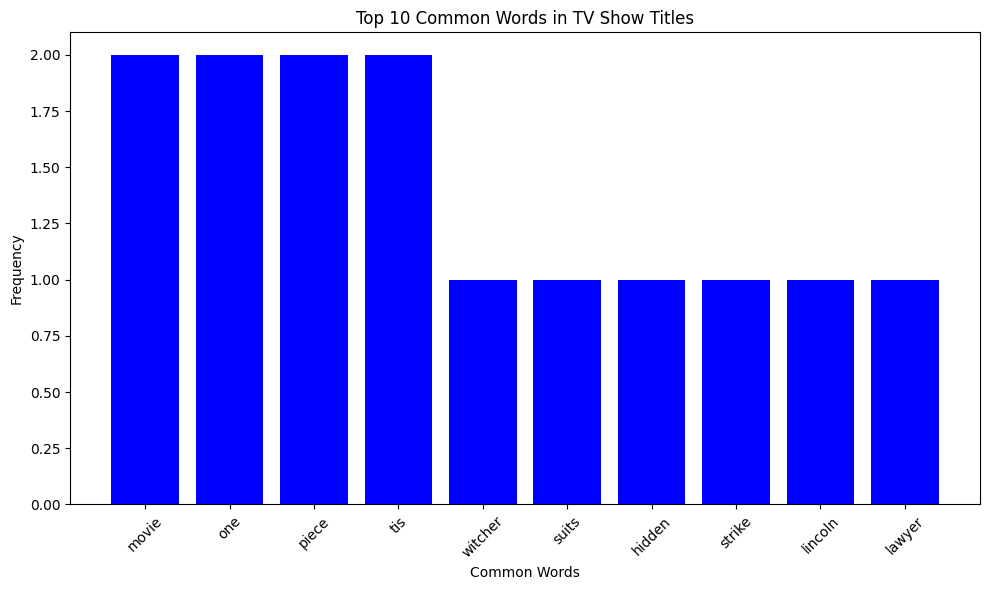

In [8]:
import matplotlib.pyplot as plt


top_common_words = word_frequency.most_common(10)
common_words = [word[0] for word in top_common_words]
word_counts = [count[1] for count in top_common_words]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(common_words, word_counts, color='blue')
plt.xlabel('Common Words')
plt.ylabel('Frequency')
plt.title('Top 10 Common Words in TV Show Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


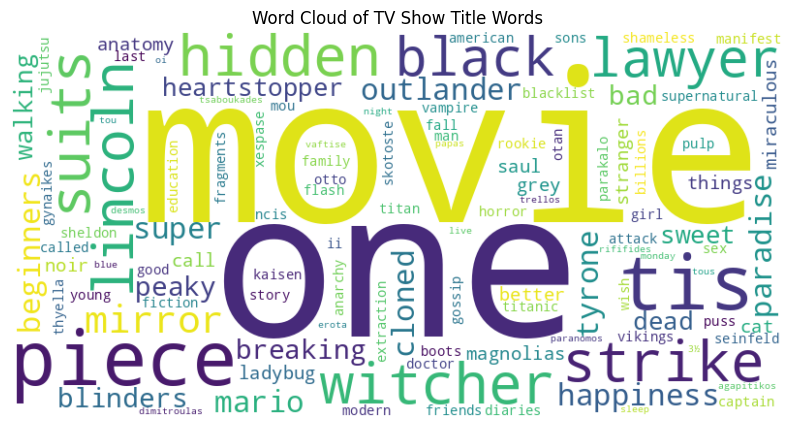

In [9]:
from wordcloud import WordCloud

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequency)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of TV Show Title Words')
plt.show()


In [10]:
!pip install textblob


In [11]:
from textblob import TextBlob

# Function to categorize sentiment
def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Add a new column 'Sentiment' to your DataFrame
netflix_df['Sentiment'] = netflix_df['Description'].apply(lambda x: categorize_sentiment(TextBlob(x).sentiment.polarity))
amazon_df['Sentiment'] = amazon_df['Description'].apply(lambda x: categorize_sentiment(TextBlob(x).sentiment.polarity))


In [12]:
# calcluating sentimental scores
netflix_avg_sentiment = netflix_df['Description'].apply(lambda x: TextBlob(x).sentiment.polarity).mean()
amazon_avg_sentiment = amazon_df['Description'].apply(lambda x: TextBlob(x).sentiment.polarity).mean()


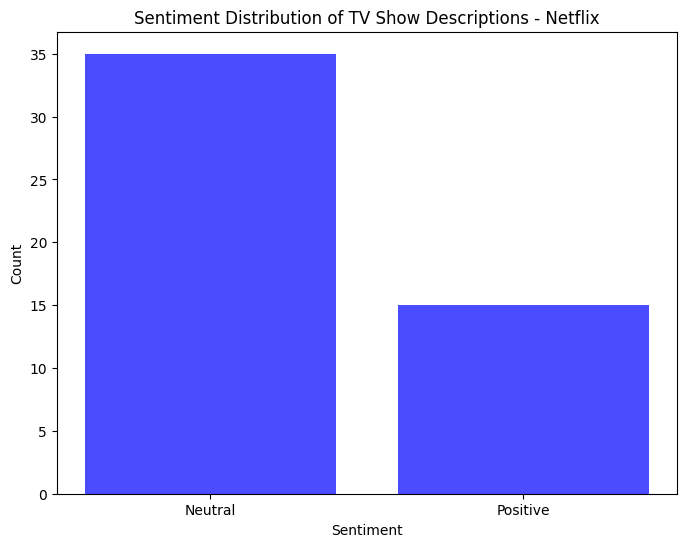

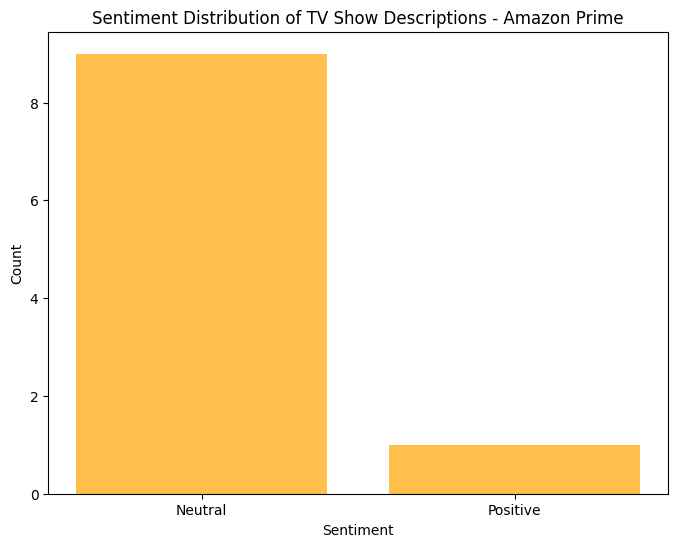

In [13]:
# Visualize sentiment distribution for Netflix using a bar chart
plt.figure(figsize=(8, 6))
netflix_sentiment_counts = netflix_df['Sentiment'].value_counts()

plt.bar(netflix_sentiment_counts.index, netflix_sentiment_counts, color='blue', alpha=0.7)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution of TV Show Descriptions - Netflix')
plt.show()

# Visualize sentiment distribution for Amazon Prime using a bar chart
plt.figure(figsize=(8, 6))
amazon_sentiment_counts = amazon_df['Sentiment'].value_counts()

plt.bar(amazon_sentiment_counts.index, amazon_sentiment_counts, color='orange', alpha=0.7)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution of TV Show Descriptions - Amazon Prime')
plt.show()


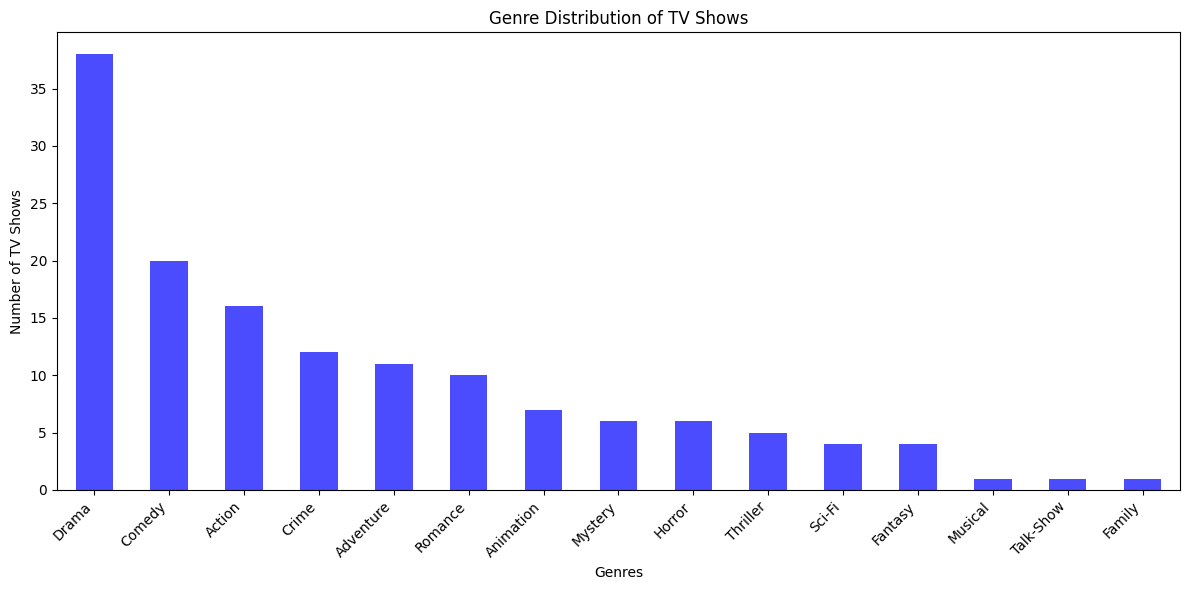

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV files into pandas DataFrames
netflix_df = pd.read_csv('netflix.csv')
amazon_df = pd.read_csv('amazon.csv')

# Combine the genre columns from both DataFrames
combined_genres = netflix_df['Genre'].tolist() + amazon_df['Genre'].tolist()

# Split combined genres into individual genre tags
all_genres = [genre.strip() for genres in combined_genres for genre in genres.split(',')]

# Create a frequency distribution of genres
genre_frequency = pd.Series(all_genres).value_counts()

# Create a bar chart for genre distribution
plt.figure(figsize=(12, 6))
genre_frequency.plot(kind='bar', color='blue', alpha=0.7)
plt.xlabel('Genres')
plt.ylabel('Number of TV Shows')
plt.title('Genre Distribution of TV Shows')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


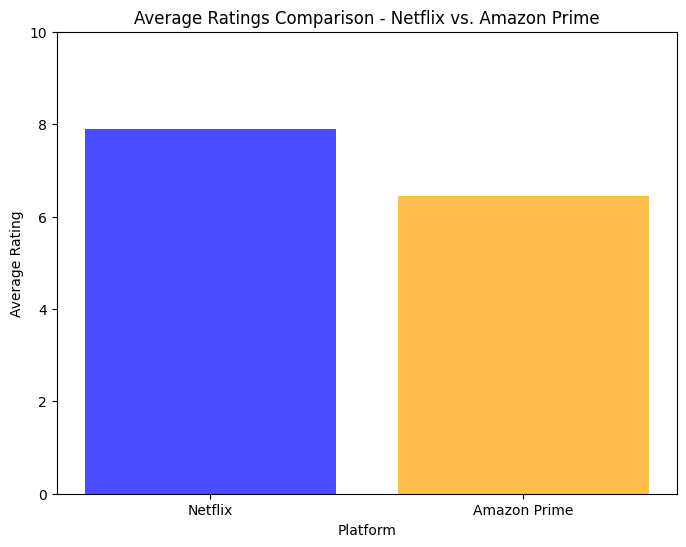

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV files into pandas DataFrames
netflix_df = pd.read_csv('netflix.csv')
amazon_df = pd.read_csv('amazon.csv')

# Calculate average ratings for Netflix and Amazon Prime
netflix_avg_rating = netflix_df['Rating'].mean()
amazon_avg_rating = amazon_df['Rating'].mean()

# Create a bar chart for average ratings comparison
plt.figure(figsize=(8, 6))
platforms = ['Netflix', 'Amazon Prime']
avg_ratings = [netflix_avg_rating, amazon_avg_rating]

plt.bar(platforms, avg_ratings, color=['blue', 'orange'], alpha=0.7)
plt.xlabel('Platform')
plt.ylabel('Average Rating')
plt.title('Average Ratings Comparison - Netflix vs. Amazon Prime')
plt.ylim(0, 10)  # Set y-axis limit to match rating scale
plt.show()


In [16]:
import pandas as pd

# Load your CSV files into pandas DataFrames
netflix_df = pd.read_csv('netflix.csv')
amazon_df = pd.read_csv('amazon.csv')

# Identify the top-rated TV shows on each platform
top_netflix_shows = netflix_df.nlargest(10, 'Rating')
top_amazon_shows = amazon_df.nlargest(10, 'Rating')

# Display the top-rated shows for each platform
print("Top Rated TV Shows on Netflix:")
print(top_netflix_shows[['Title', 'Rating']])

print("\nTop Rated TV Shows on Amazon Prime Video:")
print(top_amazon_shows[['Title', 'Rating']])


Top Rated TV Shows on Netflix:
               Title  Rating
10      Breaking Bad     9.5
29   Attack on Titan     9.1
18  Better Call Saul     9.0
12         One Piece     8.9
27           Friends     8.9
40          Seinfeld     8.9
47      Pulp Fiction     8.9
11    Peaky Blinders     8.8
4       Black Mirror     8.7
20   Stranger Things     8.7

Top Rated TV Shows on Amazon Prime Video:
                                   Title  Rating
2                 Otan xespase i thyella     8.4
1  Skotoste... tis gynaikes mou parakalo     4.5
0                              Fragments     NaN
3           O agapitikos tis Dimitroulas     NaN
4                    Rififides tou erota     NaN
5                     Monday Night Live!     NaN
6                      Oi 3½ tsaboukades     NaN
7             Trellos papas tous vaftise     NaN
8                       Paranomos desmos     NaN
9                         The Blue Sleep     NaN


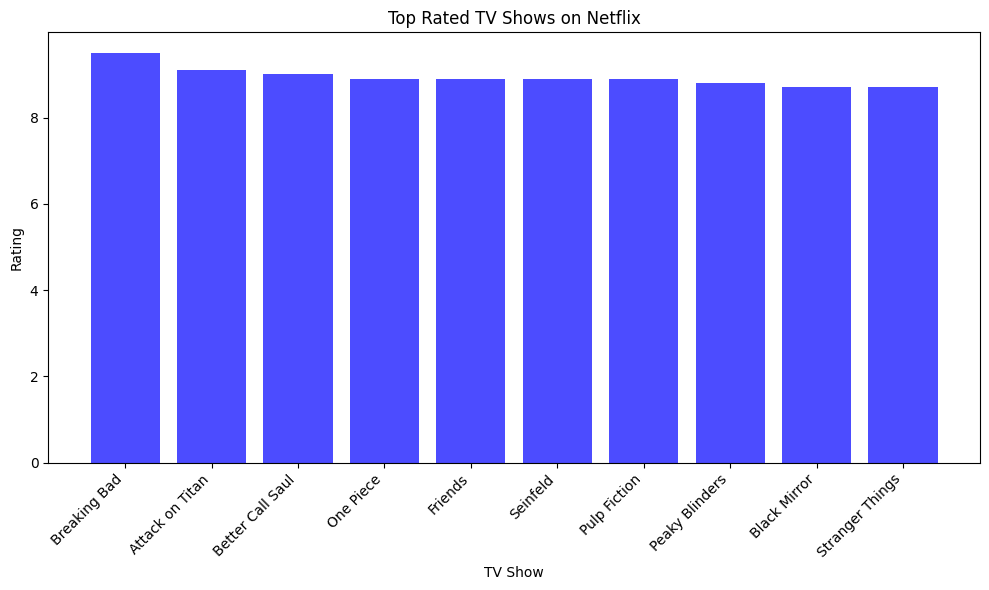

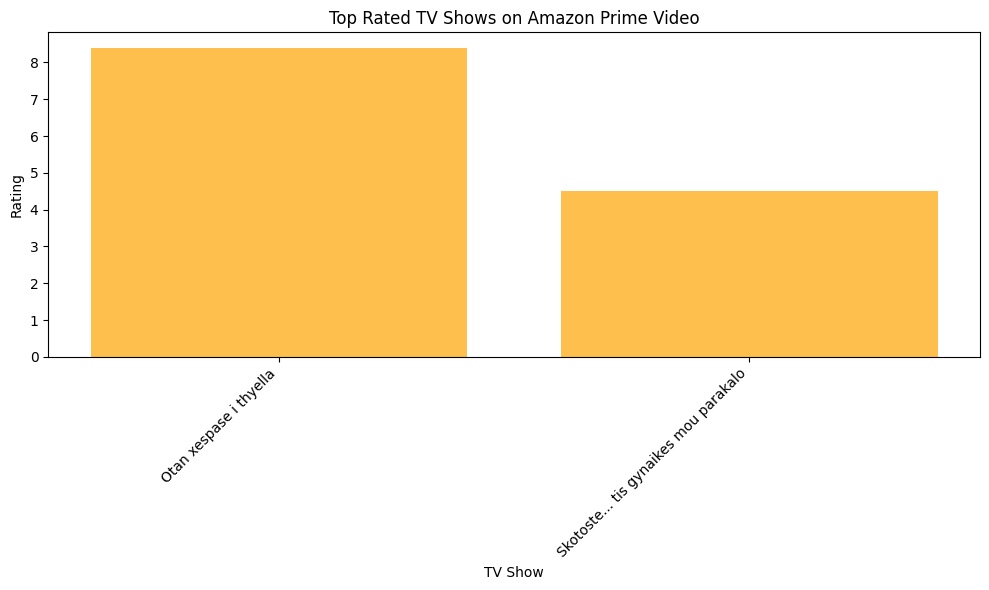

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV files into pandas DataFrames
netflix_df = pd.read_csv('netflix.csv')
amazon_df = pd.read_csv('amazon.csv')

# Identify the top-rated TV shows on each platform
top_netflix_shows = netflix_df.nlargest(10, 'Rating')
top_amazon_shows = amazon_df.nlargest(10, 'Rating')

# Create a bar chart to visualize top-rated shows on Netflix
plt.figure(figsize=(10, 6))
plt.bar(top_netflix_shows['Title'], top_netflix_shows['Rating'], color='blue', alpha=0.7)
plt.xlabel('TV Show')
plt.ylabel('Rating')
plt.title('Top Rated TV Shows on Netflix')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create a bar chart to visualize top-rated shows on Amazon Prime Video
plt.figure(figsize=(10, 6))
plt.bar(top_amazon_shows['Title'], top_amazon_shows['Rating'], color='orange', alpha=0.7)
plt.xlabel('TV Show')
plt.ylabel('Rating')
plt.title('Top Rated TV Shows on Amazon Prime Video')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [18]:
# Release Year Trends

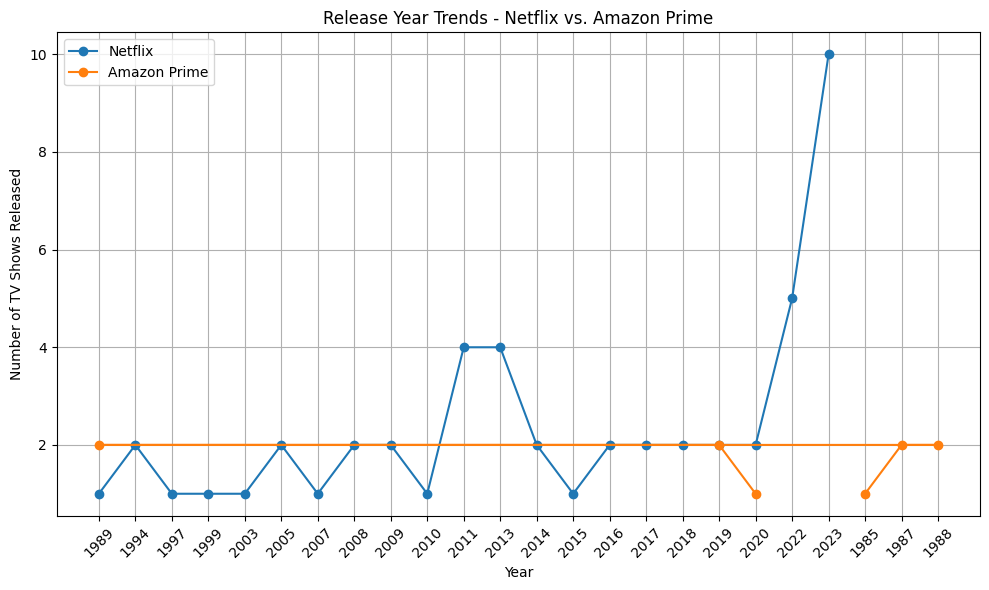

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV files into pandas DataFrames
netflix_df = pd.read_csv('netflix.csv')
amazon_df = pd.read_csv('amazon.csv')

# Extract release years and count the number of shows released each year
netflix_release_years = netflix_df['Year'].str.extract(r'(\d{4})')
amazon_release_years = amazon_df['Year'].str.extract(r'(\d{4})')

# Count the occurrences of each release year
netflix_year_counts = netflix_release_years[0].value_counts().sort_index()
amazon_year_counts = amazon_release_years[0].value_counts().sort_index()

# Create a line chart to visualize release year trends
plt.figure(figsize=(10, 6))
plt.plot(netflix_year_counts.index, netflix_year_counts.values, marker='o', label='Netflix')
plt.plot(amazon_year_counts.index, amazon_year_counts.values, marker='o', label='Amazon Prime')
plt.xlabel('Year')
plt.ylabel('Number of TV Shows Released')
plt.title('Release Year Trends - Netflix vs. Amazon Prime')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [20]:
# Comparison of Ratings and Genres

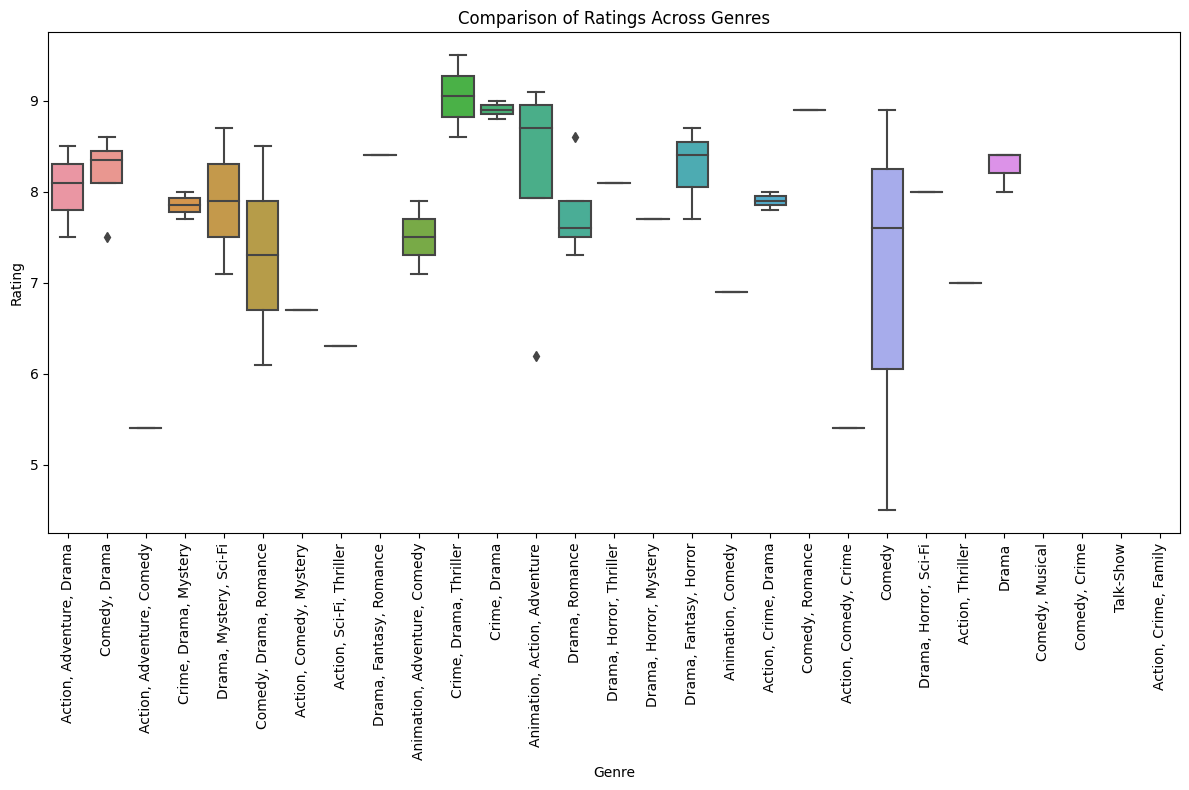

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV files into pandas DataFrames
netflix_df = pd.read_csv('netflix.csv')
amazon_df = pd.read_csv('amazon.csv')

# Combine the two DataFrames
combined_df = pd.concat([netflix_df, amazon_df])

# Create a box plot or violin plot to compare ratings across genres
plt.figure(figsize=(12, 8))
sns.boxplot(x='Genre', y='Rating', data=combined_df)
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.title('Comparison of Ratings Across Genres')
plt.tight_layout()
plt.show()


In [22]:
# content Diversity

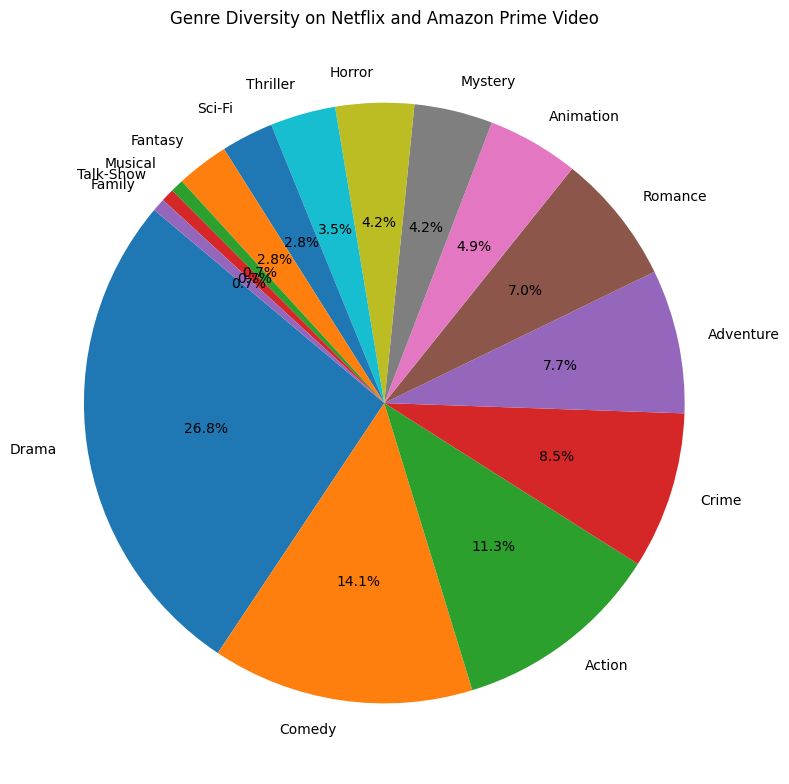

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV files into pandas DataFrames
netflix_df = pd.read_csv('netflix.csv')
amazon_df = pd.read_csv('amazon.csv')

# Combine the genre columns from both DataFrames
combined_genres = netflix_df['Genre'].tolist() + amazon_df['Genre'].tolist()

# Split combined genres into individual genre tags
all_genres = [genre.strip() for genres in combined_genres for genre in genres.split(',')]

# Count the occurrences of each genre
genre_counts = pd.Series(all_genres).value_counts()

# Create a pie chart to visualize the proportion of different genres
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Genre Diversity on Netflix and Amazon Prime Video')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.tight_layout()
plt.show()
